#Supervised Sentiment Analysis

## Text Classification
**Input**: Products reviews

**Output**: Sentiment polarity

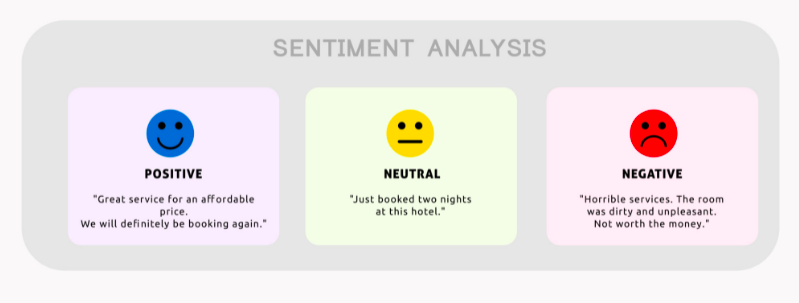

# Text Classification, Embeddings and 1D Convolutions

## Text Processing

**Bags of words**

 The first one is bag of words, in which we take each word and count the number of times it occurs in a document. We end up with each word being represented by a vector, in which each vector is the size of the number of words in the document.

 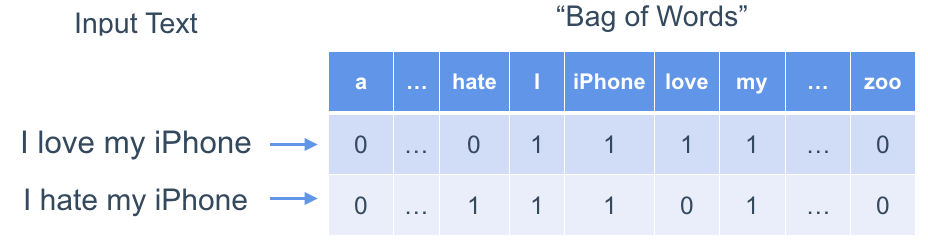

 The problem with bag of words however, is that you lose the order of words.

**Character encodings**

 We one-hot encode every character in the text, and pad out the vectors so that all the vectors are a fixed length.
 
 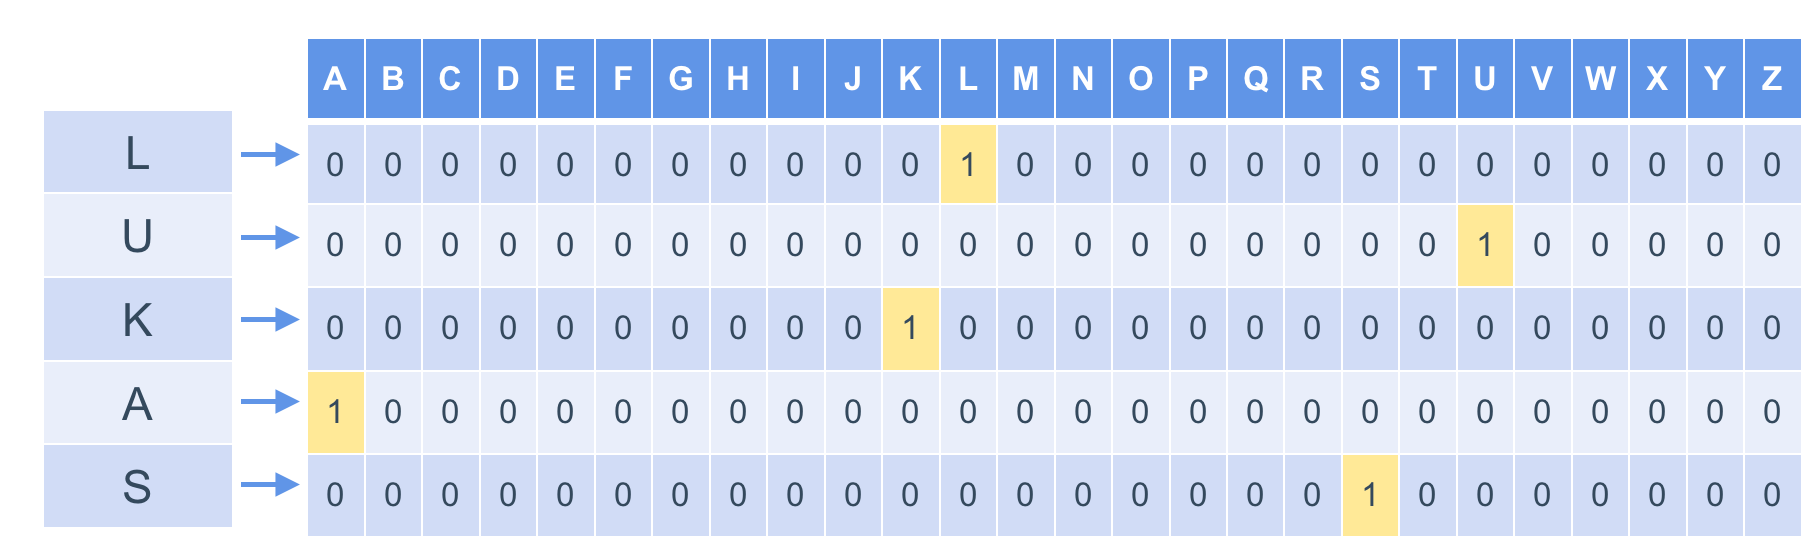
 
 The problem here however is that whole words and spaces matter a lot, and are not taken into account by character encodings.


**Word Embeddings**
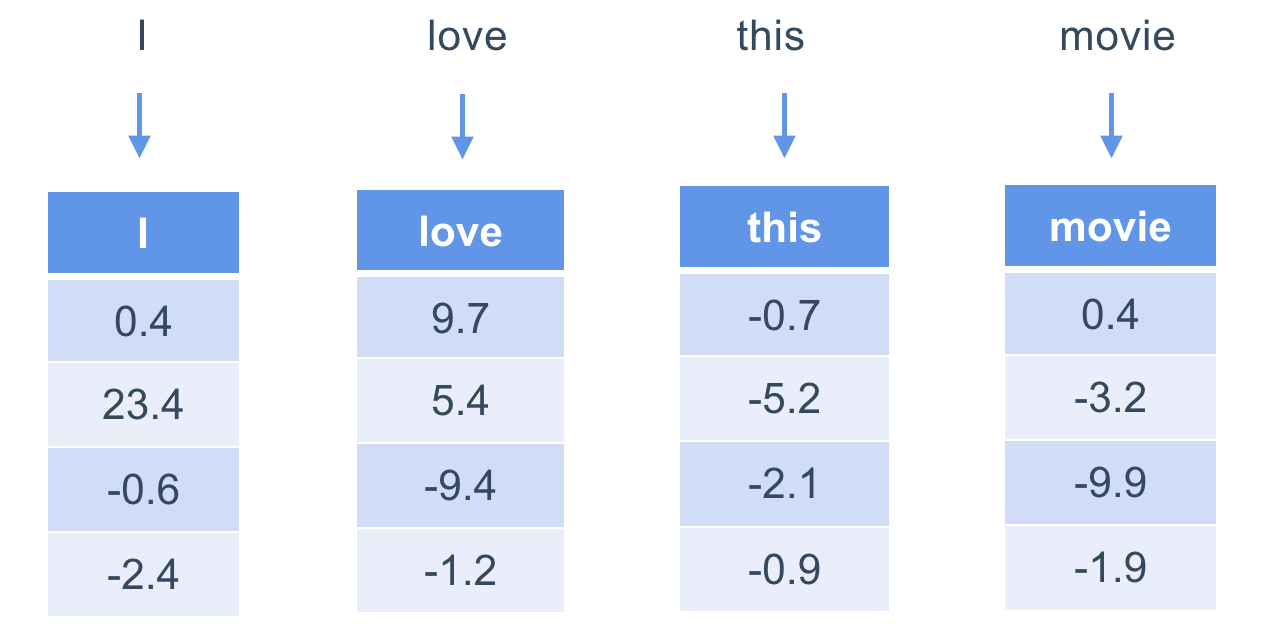
We can learn these embeddings, or we can use precomputed embeddings. For instance, GloVe is word embeddings generated by Stanford that is trained on an enormous corpus of data. These embeddings have some incredibly interesting properties.

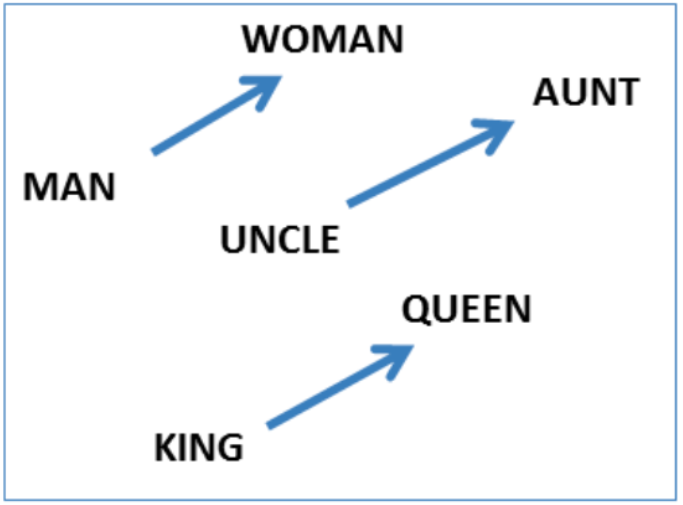

We can just download these embeddings and use it on our own dataset. Now that we have these embeddings, how can we use them in our neural network?

## 2D Convolutions Review

 In order to understand 1D convolutions, it’s useful to review the 2D convolutions on images. We would take an input, and multiply a block of the pixel input by a some weights (kernel), and put that weighted sum in the output image. We would then keep moving the kernel along and take the weighted sum at each point, and fill in the rest of the output image.
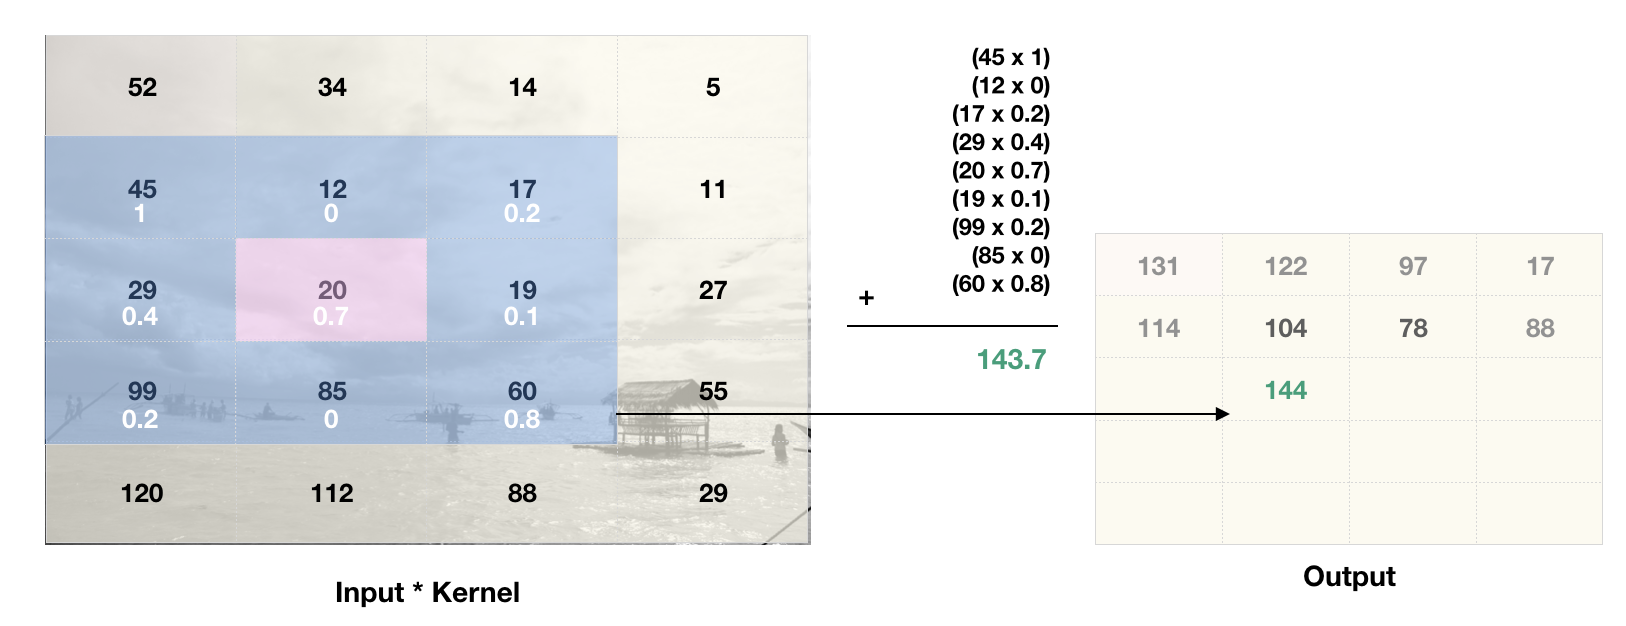

 We could also have multiple outputs from our convolution. To do this, we would start with the same image but we would use different sets of weights (different kernels). As we slide the block over, in each case we are multiplying the input by different values, and so output multiple images.
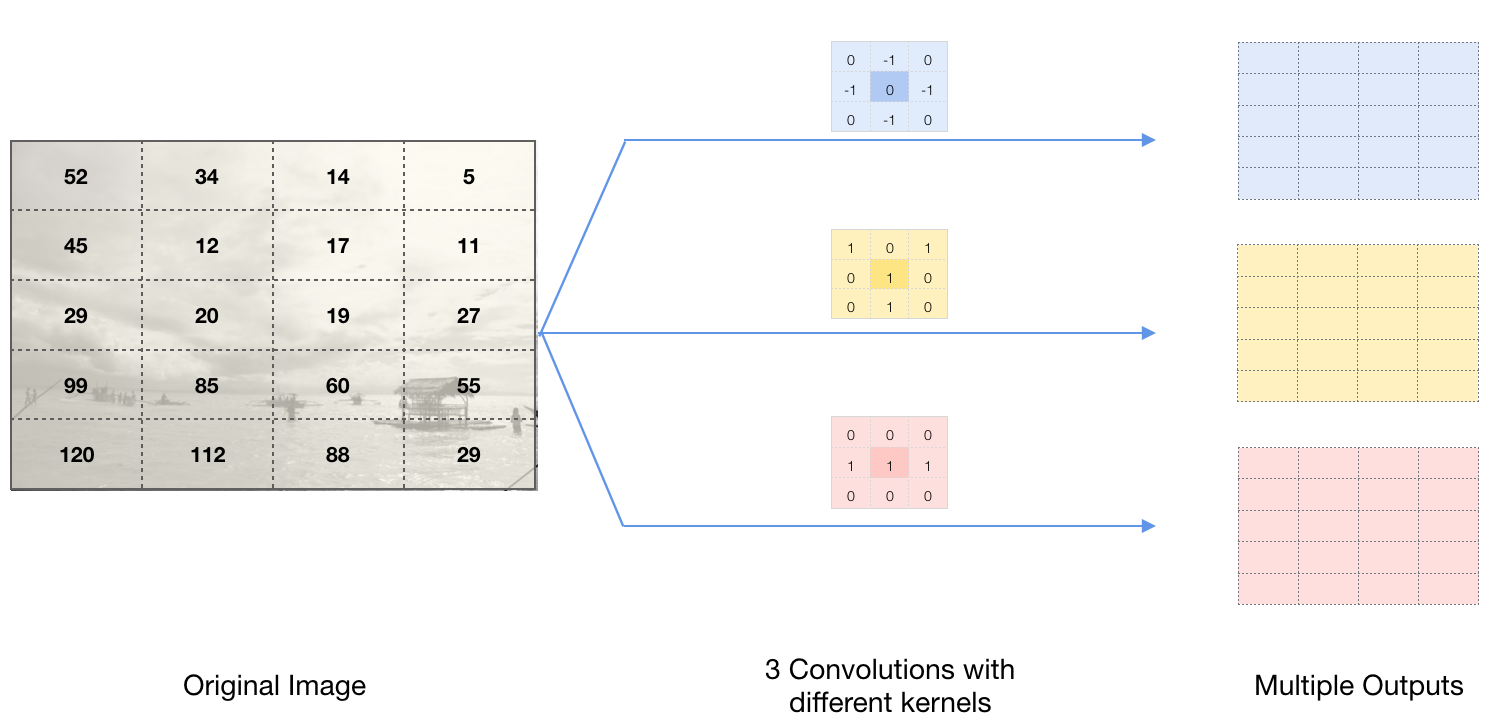

 We can also have multiple inputs. For instance, if we had three input images, we can use three different blocks of weights (kernels), and then sum the result of each of the blocks to produce one output.

 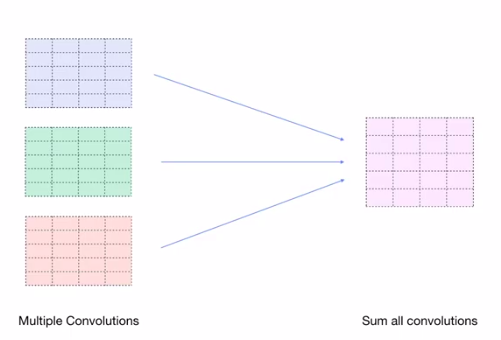

## 1D Convolutions


For our text data, the same convolution intuition applies, however, our data is now one dimensional.

https://assets.website-files.com/5ac6b7f2924c652fd013a891/5d3773ce8654d7d7434a8f96_5b883c8d4e310ce4c5029121_2018-08-28%252017.48.39.gif

## Max Pooling

You may also remember doing max pooling on images, in which we take the max value out of a block of pixels. This would shrink down the image so we could run convolutions and find patterns at multiple scales. We can also apply this operation to text. This time there is just one dimension and we do this across all channels.

https://assets.website-files.com/5ac6b7f2924c652fd013a891/5d3773ce8654d7058e4a8f95_5b883c8db9decad53453c791_2018-08-28%252018.12.12.gif

# Experiment

In [1]:
!pip install wandb
!wandb login

     |████████████████████████████████| 1.6 MB 8.3 MB/s 
     |████████████████████████████████| 133 kB 61.4 MB/s 
     |████████████████████████████████| 170 kB 45.4 MB/s 
     |████████████████████████████████| 97 kB 5.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=12e81fbe659f8b20550b681ff127b054a97ffa511017dcc0d5b1aaf901b653ac
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=61ec464c29f9da6452420283d57c3701dd748504b716bccdfe7c152144deb106
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wan

In [2]:
%cd /content/drive/MyDrive/IT4868/Experiment/L06_SA/cnn-text

/content/drive/.shortcut-targets-by-id/1CIfBwkgzyZvFDkCWib8Kv7qIBJT018ow/IT4868/Experiment/L06_SA/cnn-text


In [7]:
%run download-imdb.py

## CNNs + Word Embedding

In [10]:
%run "imdb-cnn.py"

Epoch 1/10
782/782 [==============================] - 76s 74ms/step - loss: 0.5911 - accuracy: 0.6502 - val_loss: 0.3805 - val_accuracy: 0.8298
Epoch 2/10
782/782 [==============================] - 53s 68ms/step - loss: 0.3842 - accuracy: 0.8265 - val_loss: 0.3594 - val_accuracy: 0.8410
Epoch 3/10
782/782 [==============================] - 55s 70ms/step - loss: 0.3562 - accuracy: 0.8432 - val_loss: 0.3542 - val_accuracy: 0.8442
Epoch 4/10
782/782 [==============================] - 72s 92ms/step - loss: 0.3370 - accuracy: 0.8514 - val_loss: 0.3473 - val_accuracy: 0.8481
Epoch 5/10
782/782 [==============================] - 52s 66ms/step - loss: 0.3127 - accuracy: 0.8640 - val_loss: 0.3866 - val_accuracy: 0.8350
Epoch 6/10
782/782 [==============================] - 51s 66ms/step - loss: 0.2878 - accuracy: 0.8791 - val_loss: 0.3631 - val_accuracy: 0.8469
Epoch 7/10
782/782 [==============================] - 52s 66ms/step - loss: 0.2516 - accuracy: 0.8987 - val_loss: 0.3849 - val_accuracy:

## CNNs + Pretrain Glove

### Freeze = True

In [11]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip
%run imdb-embedding.py

Epoch 1/10
782/782 [==============================] - 143s 181ms/step - loss: 0.6189 - accuracy: 0.6503 - val_loss: 0.5739 - val_accuracy: 0.6898
Epoch 2/10
782/782 [==============================] - 142s 181ms/step - loss: 0.5420 - accuracy: 0.7214 - val_loss: 0.5781 - val_accuracy: 0.6954
Epoch 3/10
782/782 [==============================] - 139s 178ms/step - loss: 0.4840 - accuracy: 0.7633 - val_loss: 0.6028 - val_accuracy: 0.6869
Epoch 4/10
782/782 [==============================] - 143s 183ms/step - loss: 0.4216 - accuracy: 0.8008 - val_loss: 0.6455 - val_accuracy: 0.6755
Epoch 5/10
782/782 [==============================] - 139s 178ms/step - loss: 0.3396 - accuracy: 0.8465 - val_loss: 0.7088 - val_accuracy: 0.6665
Epoch 6/10
782/782 [==============================] - 139s 178ms/step - loss: 0.2816 - accuracy: 0.8779 - val_loss: 0.8484 - val_accuracy: 0.6590
Epoch 7/10
782/782 [==============================] - 140s 179ms/step - loss: 0.2308 - accuracy: 0.9021 - val_loss: 1.0294 -

### Freeze = False

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip
%run imdb-embedding.py

## LSTM

In [15]:
%run /content/drive/MyDrive/IT4868/Experiment/L06_SA/cnn-text/imdb-lstm.py

Epoch 1/10
782/782 [==============================] - 106s 133ms/step - loss: 0.7061 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4994
Epoch 2/10
782/782 [==============================] - 103s 132ms/step - loss: 0.6936 - accuracy: 0.4935 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 103s 132ms/step - loss: 0.6937 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
782/782 [==============================] - 103s 131ms/step - loss: 0.6936 - accuracy: 0.4956 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/10
782/782 [==============================] - 104s 133ms/step - loss: 0.6936 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 6/10
782/782 [==============================] - 102s 131ms/step - loss: 0.6932 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
782/782 [==============================] - 102s 130ms/step - loss: 0.6936 - accuracy: 0.4996 - val_loss: 0.6932 -

## Deep LSTM

A deep LSTM is two LSTMs stacked on top of each other, where all of the output from one LSTM is fed into the second LSTM as input.

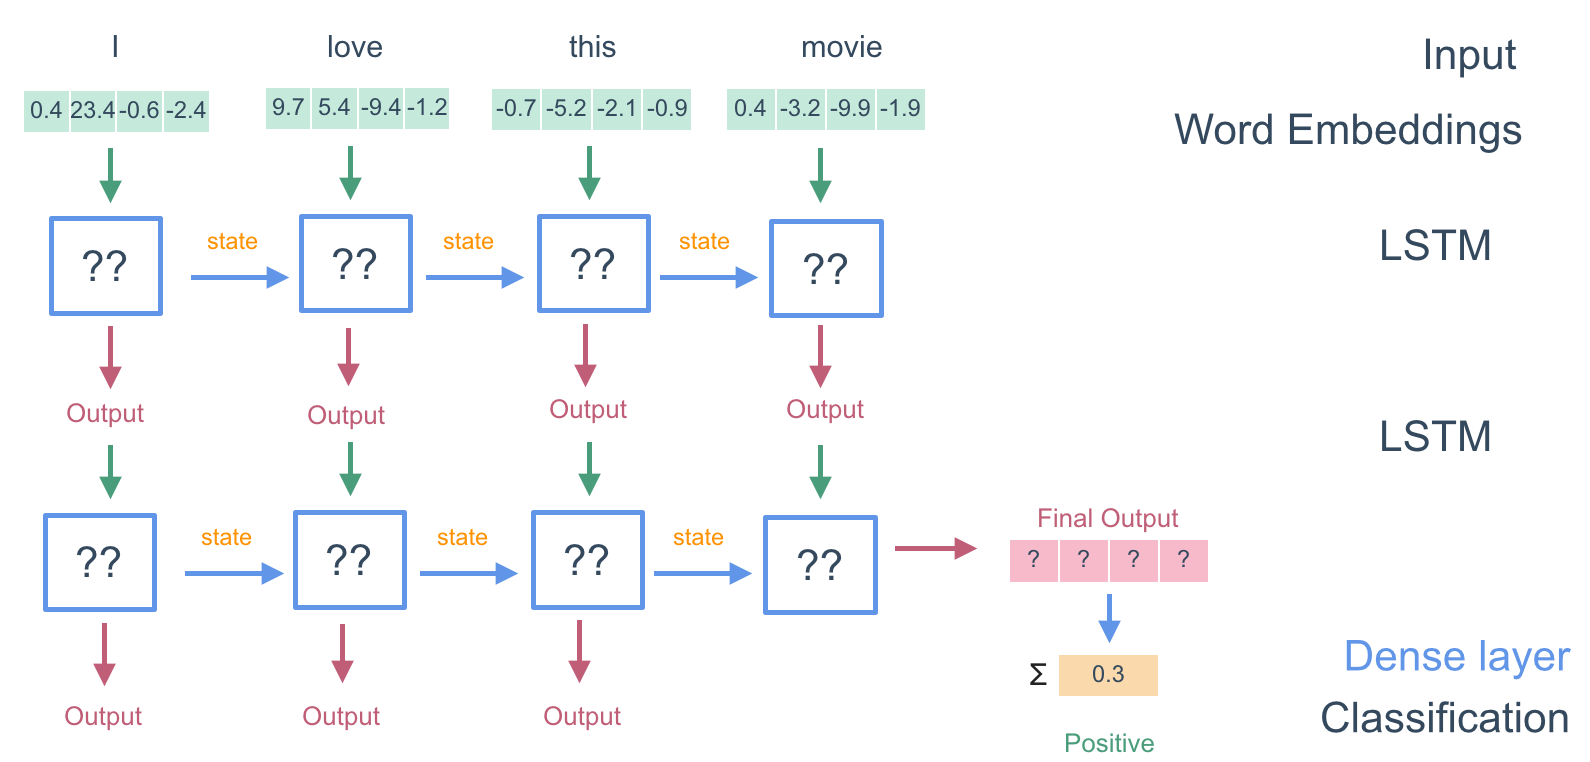

In [16]:
%run /content/drive/MyDrive/IT4868/Experiment/L06_SA/cnn-text/imdb-lstm.py

Epoch 1/10
782/782 [==============================] - 197s 246ms/step - loss: 0.6951 - accuracy: 0.4968 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/10
782/782 [==============================] - 193s 246ms/step - loss: 0.6937 - accuracy: 0.5006 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 192s 245ms/step - loss: 0.6935 - accuracy: 0.5034 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/10
782/782 [==============================] - 191s 245ms/step - loss: 0.6936 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5111
Epoch 5/10
782/782 [==============================] - 192s 246ms/step - loss: 0.6935 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 6/10
782/782 [==============================] - 194s 248ms/step - loss: 0.6935 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
782/782 [==============================] - 190s 243ms/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6945 -

## Bi-LSTM

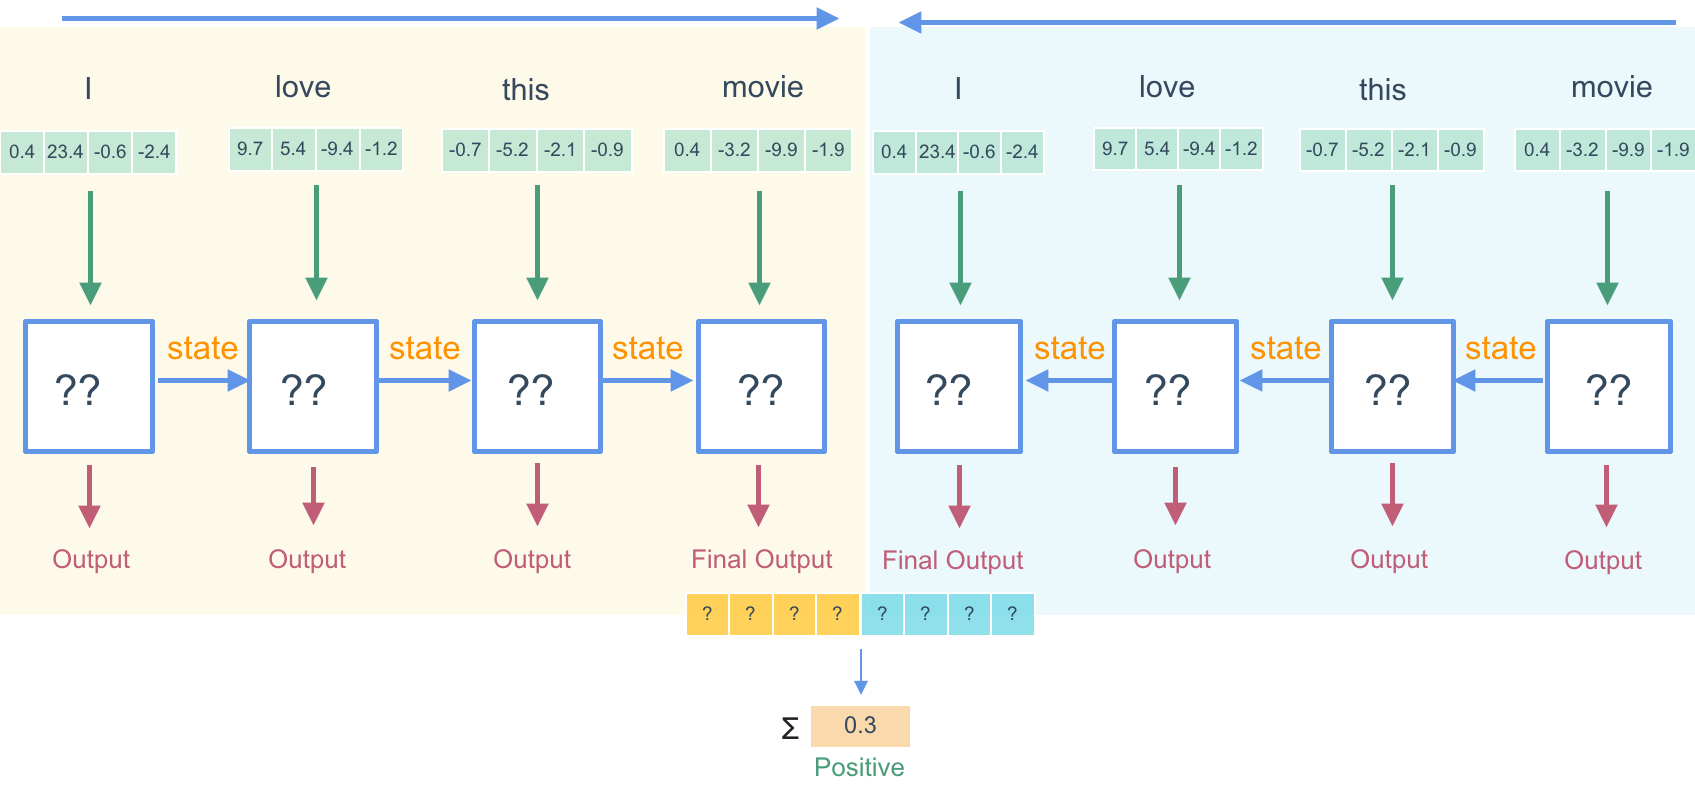

In [17]:
%run /content/drive/MyDrive/IT4868/Experiment/L06_SA/cnn-text/imdb-lstm.py

Epoch 1/10
782/782 [==============================] - 179s 219ms/step - loss: 0.6937 - accuracy: 0.4996 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/10
782/782 [==============================] - 169s 216ms/step - loss: 0.6936 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5039
Epoch 3/10
782/782 [==============================] - 170s 218ms/step - loss: 0.6935 - accuracy: 0.4969 - val_loss: 0.6935 - val_accuracy: 0.5035
Epoch 4/10
782/782 [==============================] - 170s 217ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/10
782/782 [==============================] - 168s 215ms/step - loss: 0.6930 - accuracy: 0.5095 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 6/10
782/782 [==============================] - 172s 220ms/step - loss: 0.6928 - accuracy: 0.5122 - val_loss: 0.6931 - val_accuracy: 0.5110
Epoch 7/10
782/782 [==============================] - 176s 225ms/step - loss: 0.6927 - accuracy: 0.5118 - val_loss: 0.6947 -

# Hybrid 

In [18]:
%run /content/drive/MyDrive/IT4868/Experiment/L06_SA/cnn-text/imdb-embedding.py

Epoch 1/10
782/782 [==============================] - 163s 207ms/step - loss: 0.6167 - accuracy: 0.6580 - val_loss: 0.5716 - val_accuracy: 0.6906
Epoch 2/10
782/782 [==============================] - 163s 209ms/step - loss: 0.5364 - accuracy: 0.7196 - val_loss: 0.5702 - val_accuracy: 0.6968
Epoch 3/10
782/782 [==============================] - 166s 212ms/step - loss: 0.4874 - accuracy: 0.7532 - val_loss: 0.5892 - val_accuracy: 0.6884
Epoch 4/10
782/782 [==============================] - 164s 210ms/step - loss: 0.4239 - accuracy: 0.8006 - val_loss: 0.6439 - val_accuracy: 0.6756
Epoch 5/10
782/782 [==============================] - 158s 202ms/step - loss: 0.3577 - accuracy: 0.8385 - val_loss: 0.6919 - val_accuracy: 0.6701
Epoch 6/10
782/782 [==============================] - 159s 204ms/step - loss: 0.2870 - accuracy: 0.8729 - val_loss: 0.8211 - val_accuracy: 0.6606
Epoch 7/10
782/782 [==============================] - 158s 202ms/step - loss: 0.2425 - accuracy: 0.8943 - val_loss: 1.0160 -